In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", None)

In [137]:
data = pd.read_csv("../Data/covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [138]:
data.drop("ConfirmedIndianNational", 1,inplace=True)
data.drop("ConfirmedForeignNational", 1,inplace=True)
data.drop("Time", 1,inplace=True)
data.drop("Sno", 1,inplace=True)

In [139]:
data.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [140]:
def replace_names(old,new):
    data["State/UnionTerritory"].replace(old,new,inplace=True)

In [141]:
# Cleaning data 
# Replacing incorrect names of States

replace_names("Maharashtra***", "Maharashtra")
replace_names("Madhya Pradesh***", "Madhya Pradesh")
replace_names("Bihar****", "Bihar")
replace_names("Dadra and Nagar Haveli", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Daman & Diu", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Himanchal Pradesh", "Himachal Pradesh")
replace_names("Telengana", "Telangana")
replace_names("Karanataka", "Karnataka")


states = data["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Cases being reassigned to states', 'Sikkim', 'Lakshadweep']
Total unique states and union territories = 38


In [142]:
# Checking for 'Unassigned' and 'Cases being reassigned to states rows' in the data
print('Cases being reassigned to states =', len(data[data['State/UnionTerritory'] == 'Cases being reassigned to states']))
print('Unassigned =', len(data[data['State/UnionTerritory'] == 'Unassigned']))

Cases being reassigned to states = 60
Unassigned = 3


In [143]:
indexes1 = data[data["State/UnionTerritory"] == "Cases being reassigned to states"].index
indexes2 = data[data["State/UnionTerritory"] == "Unassigned"].index
data.drop(indexes1,inplace=True)
data.drop(indexes2,inplace=True)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  18047 non-null  object
 1   State/UnionTerritory  18047 non-null  object
 2   Cured                 18047 non-null  int64 
 3   Deaths                18047 non-null  int64 
 4   Confirmed             18047 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 846.0+ KB


In [145]:
data.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [187]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x,y

(array([['2020-01-30', 'Kerala', 0, 0],
        ['2020-01-31', 'Kerala', 0, 0],
        ['2020-02-01', 'Kerala', 0, 0],
        ...,
        ['2021-08-11', 'Uttarakhand', 334650, 7368],
        ['2021-08-11', 'Uttar Pradesh', 1685492, 22775],
        ['2021-08-11', 'West Bengal', 1506532, 18252]], dtype=object),
 array([      1,       1,       2, ...,  342462, 1708812, 1534999],
       dtype=int64))

In [188]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(sparse=False), [0,1])], remainder="passthrough")
x = np.array(ct.fit_transform(x))

In [189]:
print(x)

[[1.0 0.0 0.0 ... 0.0 0 0]
 [0.0 1.0 0.0 ... 0.0 0 0]
 [0.0 0.0 1.0 ... 0.0 0 0]
 ...
 [0.0 0.0 0.0 ... 0.0 334650 7368]
 [0.0 0.0 0.0 ... 0.0 1685492 22775]
 [0.0 0.0 0.0 ... 1.0 1506532 18252]]


In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [191]:
len(x_train),len(x_test),x_train.shape, x_test.shape

(12632, 5415, (12632, 598), (5415, 598))

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train[:,-2:])
x_test = sc.transform(x_test[:,-2:])

In [193]:
y_train = sc.fit_transform(y_train.reshape(-1,1))

In [194]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [195]:
y_pred = lr.predict(x_test)
y_pred

array([[-0.43],
       [-0.38],
       [ 1.15],
       ...,
       [ 0.86],
       [-0.23],
       [-0.3 ]])

In [196]:
print(np.concatenate((sc.inverse_transform(y_pred.reshape(len(y_pred),1)), y_test.reshape(len(y_test),1)), axis=1))

[[  18523.61   13371.  ]
 [  53767.04   53222.  ]
 [1053656.67 1002600.  ]
 ...
 [ 864803.1   823607.  ]
 [ 151992.89  154936.  ]
 [ 108050.61  105424.  ]]


In [197]:
from sklearn.metrics import r2_score
a = r2_score(y_test, sc.inverse_transform(y_pred))
print(a)

0.9956862725202856


In [217]:
len(y_test)

5415

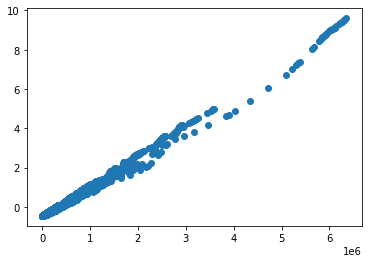

In [219]:
plt.scatter(y_test,y_pred)
plt.show()